<a href="https://colab.research.google.com/github/Lannn21/W13Datamining/blob/main/MaulanaMA_W13_Supermarket_December_2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Strategy to Boost Supermarket Sales in January

As the manager of a supermarket in Surabaya, I find myself at a crossroads as we step into January. The new year has just begun, and I am eager to understand how my supermarket has been performing. My office is filled with stacks of transaction data from our customers, brimming with numbers, percentages, and seemingly endless combinations of products. Yet, I feel lost amidst the overwhelming data.

The challenge is clear: I need **insights on what is truly happening in my supermarket**. What are the purchasing patterns of my customers? Which products are flying off the shelves, and which ones are barely noticed? More importantly, **how can I use this information to optimize the layout of the store and boost sales this year**?

In January, **the store layout is the first thing I want to focus on**. Customers are navigating through the aisles, but I want to ensure they’re being guided to the right places. I wonder: Should I place complementary products closer together? Should I create specific zones to attract customers? For instance, should shampoos be next to toothpaste or near body soaps? Should snacks and drinks be closer together to encourage impulse buys?

The only thing I have right now is the [raw transaction data](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/Supermarket-December-2017.xlsx). It tells me what customers bought, but I need help deciphering it. **Are there certain product combinations that people frequently buy together?** For example, do people who buy detergents also pick up fabric softeners? Do snacks and beverages have a strong pairing trend?

I need your expertise to dig into this data and uncover patterns. Once we understand what products customers often buy together, I can rearrange the store layout to make it more intuitive and appealing. This way, I can improve the shopping experience for my customers while also increasing the chances of cross-selling and boosting sales.

Let’s uncover the story behind the numbers and make data-driven decisions that will set my supermarket up for success in this new year. Help me turn this chaotic dataset into a clear strategy that drives results!

### Grading

1. Understanding the Data (50 points)


*   Key Metrics (0/10/15/25 points): Identifies useful insights, eg: top-selling products, etc.
*   Seasonal Insights (0/10/15/25 points): Explains trends for January, highlighting any seasonal demands or anomalies in customer behavior.
<br>
<br>

2. Recommending Layout Improvements (50 points)

*   Market Basket Analysis Insights (0/10/15/25 points): Uses association rules to determine logical groupings of products.
*   Placement Ideas (0/10/15/25 points): Provides actionable layout changes idea to increase cross-selling opportunities, such as adjusting the location of high-demand complementary items, eg:
If "Shampoo" is frequently bought with "Soap," they should be placed near each other.




In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

!pip install mlxtend==0.23.1

In [2]:
url = "https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/Supermarket-December-2017.xlsx"
df = pd.read_excel(url)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KD_SBR,TP_TRN,KDSUP,KAS,TRN_DK,GDG,GGD,KDSLS,KEL,ITEM,...,DEP_SWA,GON,KONS,POST_STOK,STATUS,TP_ADJ,USER,TANGGAL,JAM,LAMA_CRD
0,IN,JUL,NaN,6.0,K,A,AREA,NaN,KERTAS,39390.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:12:02,NaN
1,IN,JUL,NaN,6.0,K,A,AREA,NaN,BTL/DOT,13108.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:24:51,NaN
2,IN,JUL,NaN,6.0,K,A,AREA,NaN,MUSTIKA,5644.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:18,NaN
3,IN,JUL,NaN,6.0,K,A,AREA,NaN,SABUN.C,7273.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:22,NaN
4,IN,JUL,NaN,6.0,K,A,AREA,NaN,LULURMD,12168.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:20,NaN


In [3]:
df.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148489 entries, 0 to 148488
Data columns (total 61 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   KD_SBR      148486 non-null  object        
 1   TP_TRN      148486 non-null  object        
 2   KDSUP       40832 non-null   float64       
 3   KAS         136294 non-null  float64       
 4   TRN_DK      148486 non-null  object        
 5   GDG         148486 non-null  object        
 6   GGD         148486 non-null  object        
 7   KDSLS       0 non-null       float64       
 8   KEL         148486 non-null  object        
 9   ITEM        148486 non-null  float64       
 10  NAMA        148486 non-null  object        
 11  BIN         13586 non-null   float64       
 12  KDBIN       0 non-null       float64       
 13  TGL_TRANS   148486 non-null  datetime64[ns]
 14  NO_BKT      148486 non-null  object        
 15  NO_ORD      0 non-null       float64       
 16  ST

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
KD_SBR,3
TP_TRN,3
KDSUP,107657
KAS,12195
TRN_DK,3
GDG,3
GGD,3
KDSLS,148489
KEL,3
ITEM,3


In [5]:
# Daftar kolom yang dianggap tidak penting
unimportant_columns = [
    'KDSUP', 'TRN_DK', 'GDG', 'GGD', 'KDSLS', 'BIN', 'KDBIN', 'NO_ORD',
    'SLD_AK', 'SLD_AKG', 'HRG_OLD', 'HRGBL_OLD','JLH_DIS', 'JLH_DIS1', 'JLH_DIS2', 'HRGJL_OLD', 'HRGJL1_OLD',
    'HRGJL2_OLD', 'SUPP_OLD', 'DISB1_OLD', 'DISB2_OLD', 'PPN_OLD',
    'PPNBM', 'PPNBM_OLD', 'PTS_GDG', 'PTS_KEL', 'PTS_ITEM', 'QTY_PTS',
    'TRNBL', 'POST', 'TGL_OLD', 'FILLER', 'SUPPLIER', 'DEP_SWA', 'GON',
    'KONS', 'POST_STOK', 'STATUS', 'TP_ADJ', 'USER', 'LAMA_CRD', 'KD_SBR','TP_TRN','KAS','ITEM']

# Menghapus kolom yang tidak penting
df.drop(unimportant_columns, axis=1, inplace=True)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KEL,NAMA,TGL_TRANS,NO_BKT,STS_BYR,QTY,HRG_PKK,HRG_JUL,DISC,DISC1,DISC2,PPN,JLH_TRANS,KET_TRANS,TANGGAL,JAM
0,KERTAS,KERTAS KADO SINAR DU,2017-01-02,060102001,CD,2.0,549.98,1100.0,0.0,0.0,NaN,0.0,2200.0,CASH DISCOUNT,2017-01-02,08:12:02
1,BTL/DOT,PIGEON BTL PP RP 240,2017-01-02,060102002,CD,1.0,20640.45,23000.0,0.0,0.0,NaN,0.0,23000.0,CASH DISCOUNT,2017-01-02,08:24:51
2,MUSTIKA,MR SEKAR TANJUNG KB,2017-01-02,060102003,CD,1.0,8720.00,9500.0,0.0,0.0,NaN,0.0,9500.0,CASH DISCOUNT,2017-01-02,08:28:18
3,SABUN.C,BIORE BF 100ML WHITE,2017-01-02,060102003,CD,1.0,6215.00,6900.0,0.0,0.0,NaN,0.0,6900.0,CASH DISCOUNT,2017-01-02,08:28:22
4,LULURMD,OVALE LULUR BALI BEN,2017-01-02,060102003,CD,1.0,12119.65,13500.0,0.0,0.0,NaN,0.0,13500.0,CASH DISCOUNT,2017-01-02,08:28:20


In [6]:
# Replace nulls in 'DISC', 'DISC1', and 'DISC2' with 0
df['DISC'] = df['DISC'].fillna(0)
df['DISC1'] = df['DISC1'].fillna(0)
df['DISC2'] = df['DISC2'].fillna(0)

# Drop nulls in all other columns
columns_to_drop_nulls = df.columns.difference(['DISC', 'DISC1', 'DISC2'])
df.dropna(subset=columns_to_drop_nulls, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Key Metric

In [7]:
df['QTY'] = df['QTY'].astype('Int64')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
key_metrics = df.groupby(['NAMA'])['QTY'].sum().sort_values(ascending=False)
top_selling_products = key_metrics.head(5)  # Top 5 produk dengan penjualan tertinggi
top_selling_products

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,QTY
NAMA,
MIE INDOMIE GORENG 84GR,3798
TELUR AYAM HOREN / ONS,1999
AQUA 600 ML,1613
MIE SEDAP GORENG,1450
ULTRA MILK 125ML COKLAT,1164


Menampilkan Top 5 produk yang terjual, berserta dengan jumlah quantitynya

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


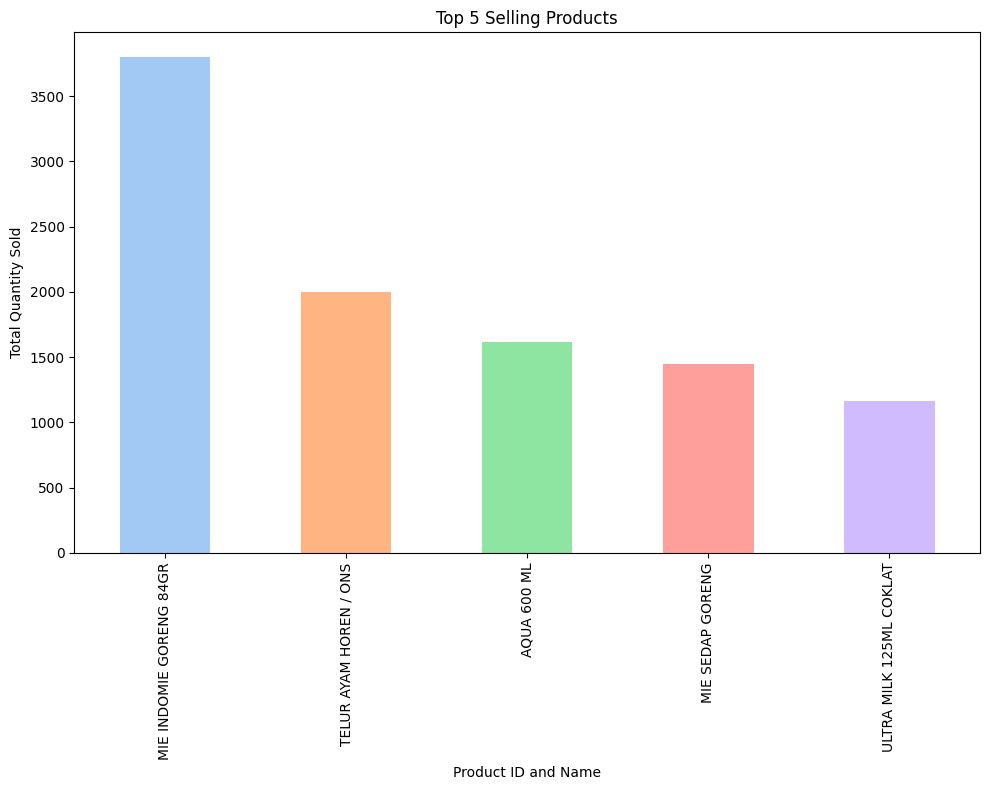

In [9]:
colors = sns.color_palette("pastel", len(top_selling_products))
plt.figure(figsize=(10, 8))
top_selling_products.plot(kind='bar', color=colors, figsize=(10, 8))
plt.title("Top 5 Selling Products")
plt.xlabel("Product ID and Name")
plt.ylabel("Total Quantity Sold")
plt.tight_layout()
plt.show()

Menampilkan visualisasi dari key metricsnya

# Seasonal Insights

In [10]:
df['TGL_TRANS'] = pd.to_datetime(df['TGL_TRANS'])  # Pastikan kolom tanggal adalah datetime
january_data = df[df['TGL_TRANS'].dt.month == 1]

seasonal_trends = january_data.groupby(january_data['TGL_TRANS'].dt.day)['QTY'].sum()
print("\nSeasonal Insights: Sales Trends in January")
print(seasonal_trends)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Seasonal Insights: Sales Trends in January
TGL_TRANS
1      8715
2     10905
3      8294
4      9233
5      7900
6      8323
7      7606
8      7321
9      6318
10     7688
11     6581
12     4905
13     7465
14     6625
15     9250
16     4665
17     7076
18     6050
19     4387
20     5766
21     5897
22     7921
23     6000
24     6588
25     7687
26     6955
27     6724
28     7104
29     9521
30    10447
31    10145
Name: QTY, dtype: Int64


Total jumlah penjualan barang perhari dalam bulan januari

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


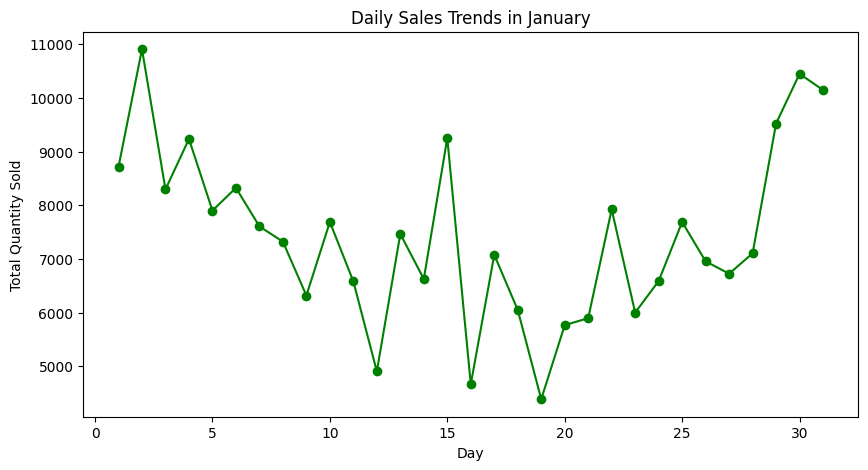

In [11]:
plt.figure(figsize=(10, 5))
seasonal_trends.plot(kind='line', marker='o', color='green')
plt.title("Daily Sales Trends in January")
plt.xlabel("Day")
plt.ylabel("Total Quantity Sold")
plt.show()

Trend penjualan per hari dalam bulan Januari dalam line chart

Berdasarkan data dan grafik tren penjualan harian di bulan Januari, terlihat bahwa penjualan cenderung fluktuatif dengan pola yang menunjukkan kenaikan signifikan pada hari-hari tertentu. Penjualan tertinggi terjadi pada hari kedua (10.905 unit) dan akhir bulan, khususnya tanggal 30 dan 31 (masing-masing 10.447 dan 10.145 unit). Pada pertengahan bulan, penjualan cenderung lebih rendah, dengan titik terendah pada tanggal 19 (4.387 unit). Setelah itu, tren menunjukkan peningkatan stabil mulai dari tanggal 20 hingga akhir bulan. Pola ini dapat mengindikasikan adanya pengaruh musim atau aktivitas promosi tertentu yang meningkatkan permintaan pada akhir bulan. Strategi promosi dan pengelolaan stok dapat difokuskan pada hari-hari dengan tren penjualan tinggi untuk memaksimalkan penjualan.

In [12]:
apriori_df = pd.crosstab(pd.read_excel(url, engine='openpyxl')['NO_BKT'], df['KEL'])
apriori_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,ALATPEL,ALBUM,AMPLOP,ASBAK,ASESORS,ASTOR,ATTACK,B DAPUR,B KUE,B POKOK,B.DWS,BABY HP,BAMBI,BANTAL,BATERAI,BEDAKBY,BELIA,BERAS,BGAMBAR,BIORE,BISC BY,BISCKLG,BISCPAK,BOLPOIN,BONEKA,BTL/DOT,BUBURBY,BUKU,BUMBU,C.MANIA,CALCULT,CAMILAN,CAMPINA,CANGKIR,CD.ANAK,CELANA,CELENGN,CETAKAN,COKLAT,COLOGBY,COLOGNE,COTTONB,CUSSONS,DDORANT,DETERJN,ELEKTRO,ESKAN,ESSENSE,FANBO,FIESTA,GARAM,GAS,GATSBY,GAYUNG,GERY,GOODTIM,GT MINI,GUCI,GULA,GUNTING,H.TONIC,HAIR SP,HANDUK,HANGER,HBL,HUKI,IKAT.P,INEZ,INSECTA,J.HUJAN,JAM,JOHNSON,K.KAKI,KACANG,KAIN,KAMPER,KAPAS,KARDUS,KARET,KARTU,KC MATA,KECAP,KEJU,KERTAS,KERUPUK,KESET,KIPAS,KONDOM,KOPI,KOSMETC,KOTAK.S,KUE,KUEPIA,LAMPU,LATULIP,LAURIER,LILIN,LULURMD,M.ANGIN,M.GOSOK,M.HEWAN,M.KOTAK,M.RAMBT,MADU,MAINAN,MANGKOK,MANISAN,MARGARN,MARINA,MCEREAL,MIE,MINUMAN,MINYAK,MISSIS,MKALENG,MOIST,MUSTIKA,N.COMPU,NAMPAN,NIVEA,NYAM MO,NYAM2,O.KUMUR,OBAT,OBATPEL,P GIGI,P.BOTOL,P.DALAM,P.RUMAH,P.WAJAH,PAKAIAN,PAMPERS,PARCEL,PARFUME,PAYUNG,PEHARUM,PELICIN,PEMBERS,PEMUTIH,PENGHRM,PENSIL,PEREKAT,PERMEN,PH M,PIGEON,PIRING,PIXY,PLASTIK,PMBALUT,PNLINER,POND'S,PSCUKUR,PUTERI,RAMROSE,RED.A,ROKOK,ROTI.B,SABUN.C,SABUN.M,SABUN.T,SABUNCP,SABUNKS,SABUNMK,SAMBAL,SANDAL,SAPU,SARIAYU,SARUNGT,SAUS,SEBAMED,SELAI,SEMIR.R,SEMIR.S,SENDOK,SEPATU,SERBET,SETRIKA,SHAMPOO,SHAPES,SIKAT,SIKAT G,SINGLET,SIRUP,SISIR,SKIPPY,SNACK,SO GOOD,SOFTENR,SOKLIN,SOSIS,SPIDOL,STANGAN,SUKANDA,SUP,SUSU,SUSU KL,SUSU KM,SUSU KT,SYLVERY,TALC,TAS,TEH,TELUR,TEMPATT,TEPAK,TEPUNG,THERMOS,TIGA R,TIM WFR,TIMBA,TIMTAM,TIPE-X,TISSU B,TISSUE,TOPI,TOPLES,TPENSIL,TS HILO,TS LOWF,TS SWET,TUSUK G,TUTUP,VAPE,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
010101001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
010101002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
010101003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
010101004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
010101005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [13]:
basket_encoded = apriori_df.applymap(lambda x: 1 if x > 0 else 0)
basket_encoded.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-13-261381838215>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = apriori_df.applymap(lambda x: 1 if x > 0 else 0)


KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,ALATPEL,ALBUM,AMPLOP,ASBAK,ASESORS,ASTOR,ATTACK,B DAPUR,B KUE,B POKOK,B.DWS,BABY HP,BAMBI,BANTAL,BATERAI,BEDAKBY,BELIA,BERAS,BGAMBAR,BIORE,BISC BY,BISCKLG,BISCPAK,BOLPOIN,BONEKA,BTL/DOT,BUBURBY,BUKU,BUMBU,C.MANIA,CALCULT,CAMILAN,CAMPINA,CANGKIR,CD.ANAK,CELANA,CELENGN,CETAKAN,COKLAT,COLOGBY,COLOGNE,COTTONB,CUSSONS,DDORANT,DETERJN,ELEKTRO,ESKAN,ESSENSE,FANBO,FIESTA,GARAM,GAS,GATSBY,GAYUNG,GERY,GOODTIM,GT MINI,GUCI,GULA,GUNTING,H.TONIC,HAIR SP,HANDUK,HANGER,HBL,HUKI,IKAT.P,INEZ,INSECTA,J.HUJAN,JAM,JOHNSON,K.KAKI,KACANG,KAIN,KAMPER,KAPAS,KARDUS,KARET,KARTU,KC MATA,KECAP,KEJU,KERTAS,KERUPUK,KESET,KIPAS,KONDOM,KOPI,KOSMETC,KOTAK.S,KUE,KUEPIA,LAMPU,LATULIP,LAURIER,LILIN,LULURMD,M.ANGIN,M.GOSOK,M.HEWAN,M.KOTAK,M.RAMBT,MADU,MAINAN,MANGKOK,MANISAN,MARGARN,MARINA,MCEREAL,MIE,MINUMAN,MINYAK,MISSIS,MKALENG,MOIST,MUSTIKA,N.COMPU,NAMPAN,NIVEA,NYAM MO,NYAM2,O.KUMUR,OBAT,OBATPEL,P GIGI,P.BOTOL,P.DALAM,P.RUMAH,P.WAJAH,PAKAIAN,PAMPERS,PARCEL,PARFUME,PAYUNG,PEHARUM,PELICIN,PEMBERS,PEMUTIH,PENGHRM,PENSIL,PEREKAT,PERMEN,PH M,PIGEON,PIRING,PIXY,PLASTIK,PMBALUT,PNLINER,POND'S,PSCUKUR,PUTERI,RAMROSE,RED.A,ROKOK,ROTI.B,SABUN.C,SABUN.M,SABUN.T,SABUNCP,SABUNKS,SABUNMK,SAMBAL,SANDAL,SAPU,SARIAYU,SARUNGT,SAUS,SEBAMED,SELAI,SEMIR.R,SEMIR.S,SENDOK,SEPATU,SERBET,SETRIKA,SHAMPOO,SHAPES,SIKAT,SIKAT G,SINGLET,SIRUP,SISIR,SKIPPY,SNACK,SO GOOD,SOFTENR,SOKLIN,SOSIS,SPIDOL,STANGAN,SUKANDA,SUP,SUSU,SUSU KL,SUSU KM,SUSU KT,SYLVERY,TALC,TAS,TEH,TELUR,TEMPATT,TEPAK,TEPUNG,THERMOS,TIGA R,TIM WFR,TIMBA,TIMTAM,TIPE-X,TISSU B,TISSUE,TOPI,TOPLES,TPENSIL,TS HILO,TS LOWF,TS SWET,TUSUK G,TUTUP,VAPE,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
010101001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
010101002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
010101003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
010101004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
010101005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [14]:
frequent_itemsets = apriori(basket_encoded, min_support=0.02, use_colnames=True)
output = frequent_itemsets[['support', 'itemsets']]
print("Frequent Itemsets:")
output

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Itemsets:


,support,itemsets
0,0.038587,(AIR.M)
1,0.032868,(ASESORS)
2,0.033576,(B DAPUR)
3,0.063953,(BISCPAK)
4,0.024262,(BTL/DOT)
5,0.032727,(COKLAT)
6,0.027008,(DDORANT)
7,0.085327,(DETERJN)
8,0.029075,(GULA)
9,0.021204,(HBL)


In [16]:
frequent_itemsets = apriori(basket_encoded, min_support=0.02, use_colnames=True)

# Generate association rules, using lift as the selection criteria
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the association rules
display(rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(SNACK),(BISCPAK),0.068794,0.063953,0.022025,0.320165,5.006275,0.017626,1.376874,0.859370
1,(BISCPAK),(SNACK),0.063953,0.068794,0.022025,0.344400,5.006275,0.017626,1.420388,0.854925
2,(MIE),(DETERJN),0.080373,0.085327,0.023922,0.297640,3.488234,0.017064,1.302285,0.775664
3,(DETERJN),(MIE),0.085327,0.080373,0.023922,0.280358,3.488234,0.017064,1.277896,0.779865
4,(SOFTENR),(DETERJN),0.043711,0.085327,0.028254,0.646373,7.575261,0.024524,2.586548,0.907666
5,(DETERJN),(SOFTENR),0.085327,0.043711,0.028254,0.331121,7.575261,0.024524,1.429690,0.948963
6,(SUSU KT),(DETERJN),0.170172,0.085327,0.024630,0.144735,1.696238,0.010110,1.069461,0.494633
7,(DETERJN),(SUSU KT),0.085327,0.170172,0.024630,0.288653,1.696238,0.010110,1.166558,0.448751
8,(PAMPERS),(P GIGI),0.142287,0.077626,0.021148,0.148627,1.914645,0.010102,1.083395,0.556958
9,(P GIGI),(PAMPERS),0.077626,0.142287,0.021148,0.272429,1.914645,0.010102,1.178872,0.517914


# Placement Ideas and Suggestion

1. Penempatan Produk yang Strategis:

Lokasi Utama: Tempatkan kategori produk dengan penjualan tinggi seperti "PAMPERS" dan "SUSU KT" di area dengan lalu lintas tinggi, seperti dekat pintu masuk atau kasir.

Pengelompokan Produk Komplementer: Berdasarkan analisis asosiasi, produk seperti "PAMPERS" dan "P GIGI" dapat ditempatkan berdekatan untuk mendorong pembelian tambahan.

Tampilan Musiman: Soroti produk musiman atau promosi, seperti "DETERJN" dan "SOFTENR" selama musim hujan, untuk menarik perhatian pembeli.

2. Optimasi di Kasir:

Pengelolaan Uang Tunai: Latih staf untuk menangani transaksi tunai dengan cepat dan efisien.

Pilihan Pembayaran: Pastikan opsi pembayaran dengan kartu debit dan kredit mudah diakses dan terlihat jelas bagi pelanggan.

3. Promosi Berdasarkan Waktu:

Promosi untuk SUSU KT: Mengingat popularitasnya, jalankan promosi rutin untuk meningkatkan penjualan.

Penawaran Pagi dan Malam: Buat diskon khusus untuk produk seperti "MIE" di pagi hari dan produk kebersihan seperti "SABUN.M" di malam hari untuk mencocokkan preferensi pelanggan.

4. Penjadwalan Staf yang Efisien:

Hari Sibuk: Jadwalkan staf tambahan pada hari Selasa dan Minggu untuk mengelola volume pelanggan yang tinggi.

Jam Fleksibel: Sesuaikan jumlah staf secara dinamis berdasarkan arus pelanggan secara real-time untuk memastikan efisiensi dan kepuasan pelanggan.

5. Keputusan Berbasis Data:

Pemantauan Berkelanjutan: Analisis secara rutin data penjualan, perilaku pelanggan, dan inventaris untuk beradaptasi dengan tren baru.

Eksperimen: Uji tata letak toko, promosi, dan strategi harga yang berbeda untuk menentukan pendekatan yang paling efektif.

Analisis Asosiasi: Gunakan hasil dari mining aturan asosiasi untuk menemukan pasangan produk spesifik, seperti "SHAMPOO" dan "P GIGI", guna meningkatkan strategi penempatan dan promosi.



# Market Basket Analysis

Hasil Market Basket Analysis:

1. Temuan Utama:

Pasangan produk dengan asosiasi kuat:

"SNACK" dan "BISCPAK" memiliki tingkat asosiasi tinggi dengan confidence 32% dan lift 5,00.

"P GIGI" dan "SABUN.M" memiliki confidence 53,47% dan lift 6,11, menunjukkan hubungan kuat antar kedua produk.

"SHAMPOO" dan "P GIGI" dengan confidence 49,45% dan lift 5,49, cocok untuk strategi cross-selling.

2. Interpretasi dan Tindakan:

Produk dengan asosiasi tinggi, seperti "P GIGI" dan "SABUN.M," dapat ditempatkan berdekatan untuk meningkatkan penjualan.

Kombinasi "SNACK" dan "BISCPAK" dapat diiklankan sebagai paket hemat atau promosi bundel untuk meningkatkan daya tarik pelanggan.

Produk seperti "SHAMPOO" dan "P GIGI" dapat dimanfaatkan dalam promosi musiman atau diskon untuk menarik pelanggan.

3. Strategi Lanjutan:

Monitor terus pola pembelian baru untuk menyesuaikan strategi penempatan dan promosi.

Optimalkan area display berdasarkan produk dengan lift tinggi untuk memaksimalkan penjualan.

